# Лінійна регресія: перенавчання і регуляризація

У цьому завданні ми на прикладах побачимо, як перенавчаються лінійні моделі, розберемо, чому так відбувається, і з'ясуємо, як діагностувати та контролювати перенавчання.

В усіх комірках, де вказаний коментар з інструкціями, потрібно написати код, який виконує ці інструкції. Решту комірок із кодом (без коментарів) треба просто виконати. Крім того, у завданні необхідно відповідати на запитання; відповіді потрібно вписувати після виділеного слова "__Відповідь:__".

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

Ми будемо працювати з датасетом __"bikes_rent.csv"__, у якому по днях записані календарна інформація та погодні умови, що характеризують автоматизовані пункти прокату велосипедів, а також кількість прокатів у цей день. Останнє ми будемо передбачати; таким чином, ми будемо розв'язувати завдання регресії.

### Ознайомлення з даними

## Завдання 1

Завантажте датасет за допомогою функції __pandas.read_csv__ у змінну __df__. Виведіть перші 5 рядків, щоб переконатися в коректному зчитуванні даних:

In [2]:
df = pd.read_csv("bikes_rent.csv") # put your code here
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


Для кожного дня прокату відомі такі ознаки:
* _season_: 1 — весна, 2 — літо, 3 — осінь, 4 — зима
* _yr_: 0 — 2011, 1 — 2012
* _mnth_: від 1 до 12
* _holiday_: 0 — немає свята, 1 — є свято
* _weekday_: від 0 до 6
* _workingday_: 0 — неробочий день, 1 — робочий день
* _weathersit_: оцінка сприятливості погоди від 1 (чистий, ясний день) до 4 (злива, туман)
* _temp_: температура в Цельсіях
* _atemp_: температура за відчуттями в Цельсіях
* _hum_: вологість
* _windspeed(mph)_: швидкість вітру в милях за годину
* _windspeed(ms)_: швидкість вітру в метрах за секунду
* _cnt_: кількість орендованих велосипедів (це цільова ознака, її ми будемо передбачати)

Отже, у нас є речові, бінарні та номінальні (порядкові) ознаки, і з усіма з них можна працювати як з речовими. З номінальними ознаками теж можна працювати як з речовими, тому що на них заданий порядок. Давайте подивимося на графіках, як цільова ознака залежить від решти.

Побудуйте графіки залежностей атрибутів від кількості поїздок. Іншими словами, вам потрібно побудувати 12 графіків. На кожному має бути зображена залежність чергового атрибута від змінної **cnt**.

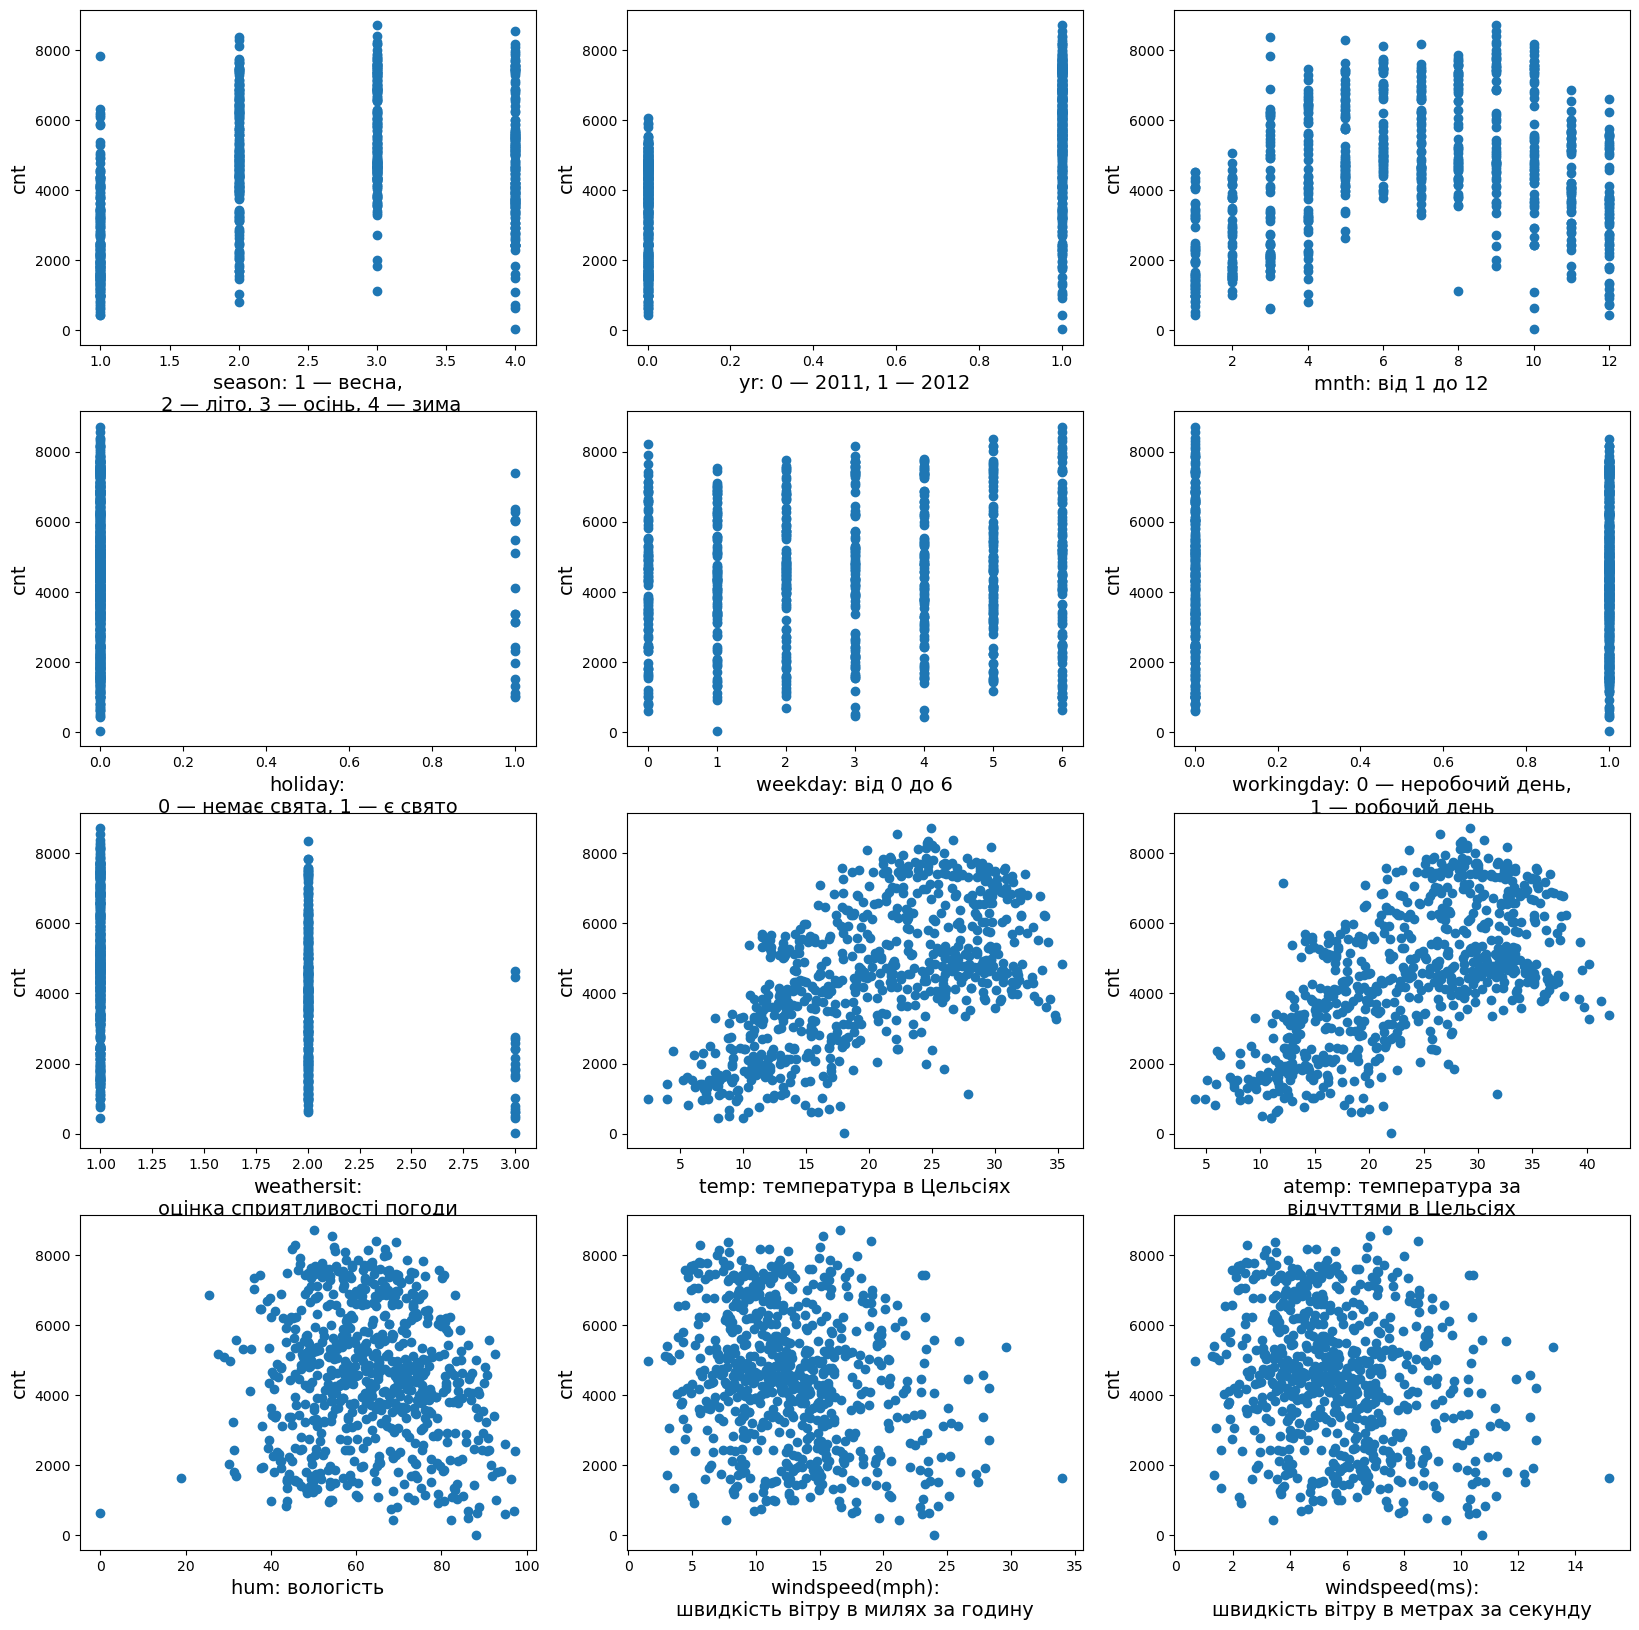

In [3]:
# Put you code here
fig1, ax1 = plt.subplots(nrows=4, ncols=3 , figsize = (20,20))

ax1[0,0].scatter(df.season, df.cnt)
ax1[0,0].set_ylabel("cnt", fontsize = 14)
ax1[0,0].set_xlabel("season: 1 — весна,\n 2 — літо, 3 — осінь, 4 — зима", fontsize = 14)

ax1[0,1].scatter(df.yr, df.cnt)
ax1[0,1].set_ylabel("cnt", fontsize = 14)
ax1[0,1].set_xlabel("yr: 0 — 2011, 1 — 2012", fontsize = 14)

ax1[0,2].scatter(df.mnth, df.cnt)
ax1[0,2].set_ylabel("cnt", fontsize = 14)
ax1[0,2].set_xlabel("mnth: від 1 до 12", fontsize = 14)

ax1[1,0].scatter(df.holiday, df.cnt)
ax1[1,0].set_ylabel("cnt", fontsize = 14)
ax1[1,0].set_xlabel("holiday:\n0 — немає свята, 1 — є свято", fontsize = 14)

ax1[1,1].scatter(df.weekday, df.cnt)
ax1[1,1].set_ylabel("cnt", fontsize = 14)
ax1[1,1].set_xlabel("weekday: від 0 до 6", fontsize = 14)

ax1[1,2].scatter(df.workingday, df.cnt)
ax1[1,2].set_ylabel("cnt", fontsize = 14)
ax1[1,2].set_xlabel("workingday: 0 — неробочий день,\n1 — робочий день", fontsize = 14)

ax1[2,0].scatter(df.weathersit, df.cnt)
ax1[2,0].set_ylabel("cnt", fontsize = 14)
ax1[2,0].set_xlabel("weathersit:\nоцінка сприятливості погоди\nвід 1 (чистий, ясний день)\nдо 4 (злива, туман)", fontsize = 14)

ax1[2,1].scatter(df.temp, df.cnt)
ax1[2,1].set_ylabel("cnt", fontsize = 14)
ax1[2,1].set_xlabel("temp: температура в Цельсіях", fontsize = 14)

ax1[2,2].scatter(df.atemp, df.cnt)
ax1[2,2].set_ylabel("cnt", fontsize = 14)
ax1[2,2].set_xlabel("atemp: температура за\nвідчуттями в Цельсіях", fontsize = 14)

ax1[3,0].scatter(df.hum, df.cnt)
ax1[3,0].set_ylabel("cnt", fontsize = 14)
ax1[3,0].set_xlabel("hum: вологість", fontsize = 14)

ax1[3,1].scatter(df["windspeed(mph)"], df.cnt)
ax1[3,1].set_ylabel("cnt", fontsize = 14)
ax1[3,1].set_xlabel("windspeed(mph):\nшвидкість вітру в милях за годину", fontsize = 14)

ax1[3,2].scatter(df["windspeed(ms)"], df.cnt)
ax1[3,2].set_ylabel("cnt", fontsize = 14)
ax1[3,2].set_xlabel("windspeed(ms):\nшвидкість вітру в метрах за секунду", fontsize = 14)

plt.show()

# Відповіді:
# 1. Яким є характер залежності кількості прокатів від місяця?: нелінійна(поліноміальна) залежність.
# 2. Вкажіть одну або дві ознаки, від яких кількість прокатів скоріше за все залежить лінійно:
# weathersit, temp, atemp


__Запитання:__
1. Яким є характер залежності кількості прокатів від місяця?
1. Вкажіть одну або дві ознаки, від яких кількість прокатів скоріше за все залежить лінійно.

## Завдання 2

Давайте більш строго оцінимо рівень лінійної залежності між ознаками та цільовою змінною. Гарною мірою лінійної залежності між двома векторами є кореляція Пірсона. Нам уже доводилося мати з нею справу раніше. Для її обчислення в pandas можна використовувати методи датафрейму: corr і corrwith.

Порахуйте кореляції всіх ознак, окрім останньої, з останньою за допомогою методу `corrwith`.

In [4]:
# Put your code here
cnt_df = pd.DataFrame(df.cnt)

print("cnt vs season")
print(cnt_df.corrwith(df.season))

print("\ncnt vs yr")
print(cnt_df.corrwith(df.yr))

print("\ncnt vs mnth")
print(cnt_df.corrwith(df.mnth))

print("\ncnt vs holiday")
print(cnt_df.corrwith(df.holiday))

print("\ncnt vs weekday")
print(cnt_df.corrwith(df.weekday))

print("\ncnt vs workingday")
print(cnt_df.corrwith(df.workingday))

print("\ncnt vs weathersit")
print(cnt_df.corrwith(df.weathersit))

print("\ncnt vs temp")
print(cnt_df.corrwith(df.temp))

print("\ncnt vs atemp")
print(cnt_df.corrwith(df.atemp))

print("\ncnt vs hum")
print(cnt_df.corrwith(df.hum))

print("\ncnt vs windspeed(mph)")
print(cnt_df.corrwith(df["windspeed(mph)"]))

print("\ncnt vs windspeed(ms)")
print(cnt_df.corrwith(df["windspeed(ms)"]))


cnt vs season
cnt    0.4061
dtype: float64

cnt vs yr
cnt    0.56671
dtype: float64

cnt vs mnth
cnt    0.279977
dtype: float64

cnt vs holiday
cnt   -0.068348
dtype: float64

cnt vs weekday
cnt    0.067443
dtype: float64

cnt vs workingday
cnt    0.061156
dtype: float64

cnt vs weathersit
cnt   -0.297391
dtype: float64

cnt vs temp
cnt    0.627494
dtype: float64

cnt vs atemp
cnt    0.631066
dtype: float64

cnt vs hum
cnt   -0.100659
dtype: float64

cnt vs windspeed(mph)
cnt   -0.234545
dtype: float64

cnt vs windspeed(ms)
cnt   -0.234545
dtype: float64


У вибірці є ознаки, що корелюють із цільовою, а отже, завдання можна розв'язувати лінійними методами.

За графіками видно, що деякі ознаки схожі між собою. Тому давайте також порахуємо кореляції між речовими ознаками.

## Завдання 3

Порахуйте попарні кореляції між ознаками temp, atemp, hum, windspeed(mph), windspeed(ms) і cnt
за допомогою методу corr:

In [5]:
df.loc[:,["temp", "atemp", "hum", "windspeed(mph)", "windspeed(ms)", "cnt"]].corr()


,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
temp,1.000000,0.991702,0.126963,-0.157944,-0.157944,0.627494
atemp,0.991702,1.000000,0.139988,-0.183643,-0.183643,0.631066
hum,0.126963,0.139988,1.000000,-0.248489,-0.248489,-0.100659
windspeed(mph),-0.157944,-0.183643,-0.248489,1.000000,1.000000,-0.234545
windspeed(ms),-0.157944,-0.183643,-0.248489,1.000000,1.000000,-0.234545
cnt,0.627494,0.631066,-0.100659,-0.234545,-0.234545,1.000000


На діагоналях, як і належить, стоять одиниці. Однак у матриці є ще дві пари сильно корелюючих стовпців: temp і atemp (корелюють за своєю природою) і два windspeed (тому що це просто переведення одних одиниць в інші). Далі ми побачимо, що цей факт негативно позначається на навчанні лінійної моделі.

Насамкінець подивимося середні ознак (метод mean), щоб оцінити масштаб ознак і частки 1 у бінарних ознак.

## Завдання 4

Виведіть середні ознак.

In [6]:
# Put your code here
df.mean()

season               2.496580
yr                   0.500684
mnth                 6.519836
holiday              0.028728
weekday              2.997264
workingday           0.683995
weathersit           1.395349
temp                20.310776
atemp               23.717699
hum                 62.789406
windspeed(mph)      12.762576
windspeed(ms)        5.705220
cnt               4504.348837
dtype: float64

Ознаки мають різний масштаб, отже, для подальшої роботи нам краще нормувати матрицю об'єкти-ознаки.

### Проблема перша: колінеарні ознаки

Отже, у наших даних одна ознака дублює іншу, і є ще дві дуже схожі. Звичайно, ми могли б одразу видалити дублікати, але давайте подивимося, як відбувалося б навчання моделі, якби ми не помітили цю проблему.

Для початку проведемо масштабування, або стандартизацію ознак: з кожної ознаки віднімемо її середнє і поділимо на стандартне відхилення. Це можна зробити за допомогою методу scale.

Крім того, необхідно перемішати вибірку, це буде потрібно для крос-валідації.

In [7]:
from sklearn.preprocessing import scale
from sklearn.utils import shuffle

In [8]:
df_shuffled = shuffle(df, random_state=42)
X = scale(df_shuffled[df_shuffled.columns[:-1]])
y = df_shuffled["cnt"]

Давайте навчимо лінійну регресію на наших даних і подивимося на ваги ознак.

In [9]:
from sklearn.linear_model import LinearRegression

## Завдання 5

Створіть об'єкт лінійного регресора, навчіть його на всіх даних і виведіть ваги моделі (ваги зберігаються у змінній `coef_` класу регресора). Можна виводити пари (назва ознаки, вага), скориставшись функцією `zip`, вбудованою в мову python. Назви ознак зберігаються у змінній `df.columns`.


In [10]:
# Put your code here
lin_reg = LinearRegression()
lin_reg.fit(X, y)

for column, coef in zip(df.columns[:-1], lin_reg.coef_):
    print(f"{column}: {coef}")


season: 570.8649824275465
yr: 1021.9631023507875
mnth: -141.30297353055363
holiday: -86.75813073283305
weekday: 137.22733389864143
workingday: 56.392289569168774
weathersit: -330.2279812756187
temp: 367.4873793462487
atemp: 585.543584601299
hum: -145.61413250496236
windspeed(mph): 12457135039403.14
windspeed(ms): -12457135039601.604


Ми бачимо, що ваги при лінійно-залежних ознаках за модулем значно більші, ніж при інших ознаках. Щоб зрозуміти, чому так сталося, згадаємо аналітичну формулу, за якою обчислюються ваги лінійної моделі в методі найменших квадратів:

$$w = (X^TX)^{-1} X^T y$$

Якщо в $X$ є колінеарні (лінійно-залежні) стовпці, матриця $X^TX$ стає виродженою, і формула перестає бути коректною. Чим більш залежні ознаки, тим менший визначник цієї матриці й тим гірша апроксимація $Xw \approx y$. Таку ситуацію називають _проблемою мультиколінеарності_.

З парою (temp, atemp) трохи менше корелюючих змінних такого не сталося, однак на практиці завжди варто уважно стежити за коефіцієнтами при схожих ознаках.

Для того щоб розв'язати проблему мультиколінеарності, потрібно скористатися регуляризатором. До оптимізуючого функціоналу додають $L_1$ або $L_2$ норму ваг, помножену на коефіцієнт регуляризації $\alpha$. У першому випадку метод називається Lasso, а у другому — Ridge.

### Завдання 6
Давайте спробуємо навчити лінійні моделі з $L_1$ і $L_2$-регуляризацією, а далі порівняємо їхні ваги. Навчіть регресори Ridge і Lasso з параметрами за замовчуванням і переконайтеся, що проблема з вагами вирішилась.

Навчіть лінійну модель з $L_1$-регуляризацією (клас Lasso) і виведіть ваги.

In [11]:
# Put your code here
from sklearn.linear_model import Lasso, Ridge
lin_reg = Lasso()
lin_reg.fit(X, y)

for column, coef in zip(df.columns[:-1], lin_reg.coef_):
    print(f"{column}: {coef}")

season: 560.2416160308862
yr: 1019.4634940657196
mnth: -128.7306270367869
holiday: -86.15278133371095
weekday: 137.3478939049631
workingday: 55.21237064135677
weathersit: -332.3698569623486
temp: 376.36323620969597
atemp: 576.5307935045538
hum: -144.129155003486
windspeed(mph): -197.13968940248404
windspeed(ms): -2.8051512738133662e-08


Навчіть лінійну модель з $L_2$-регуляризацією (клас Ridge) і виведіть ваги.

In [12]:
# Put your code here
lin_reg = Ridge()
lin_reg.fit(X, y)

for column, coef in zip(df.columns[:-1], lin_reg.coef_):
    print(f"{column}: {coef}")

season: 563.0645722520193
yr: 1018.9483787875306
mnth: -131.8733202824786
holiday: -86.74609799709202
weekday: 138.00511117871915
workingday: 55.903110375064806
weathersit: -332.3497884990724
temp: 386.4578891919171
atemp: 566.3470470600581
hum: -145.07132729867268
windspeed(mph): -99.25944108181756
windspeed(ms): -99.25944115431525


### Завдання 7

На відміну від $L_2$-регуляризації, $L_1$ обнуляє ваги при деяких ознаках. Давайте поспостерігаємо, як змінюються ваги зі збільшенням коефіцієнта регуляризації $\alpha$.

Для кожного значення коефіцієнта з `alphas` навчіть регресор `Lasso` і запишіть ваги у список `coefs_lasso`, а потім навчіть `Ridge` і запишіть ваги у список`coefs_ridge`. Конвертуйте отримані списки в `np.array`.

In [13]:
alphas = np.arange(1, 500, 50)

coefs_lasso = [] # Put your code here
coefs_ridge = [] # Put your code here

for alpha in alphas:
    # Put your code here
    coefs_lasso.append(Lasso(alpha=alpha).fit(X, y).coef_)
    coefs_ridge.append(Ridge(alpha=alpha).fit(X, y).coef_)

# Put your code here
coefs_lasso = np.array(coefs_lasso)
coefs_ridge = np.array(coefs_ridge)


Проаналізуйте динаміку ваг при збільшенні параметра регуляризації:

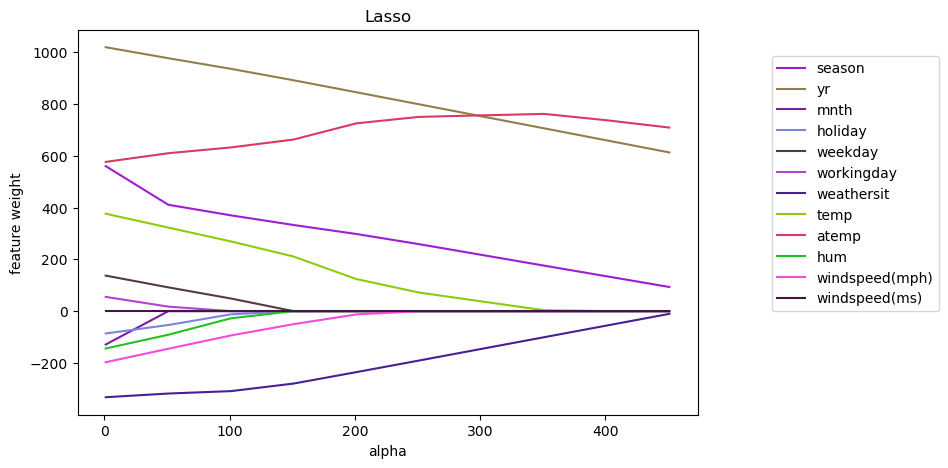

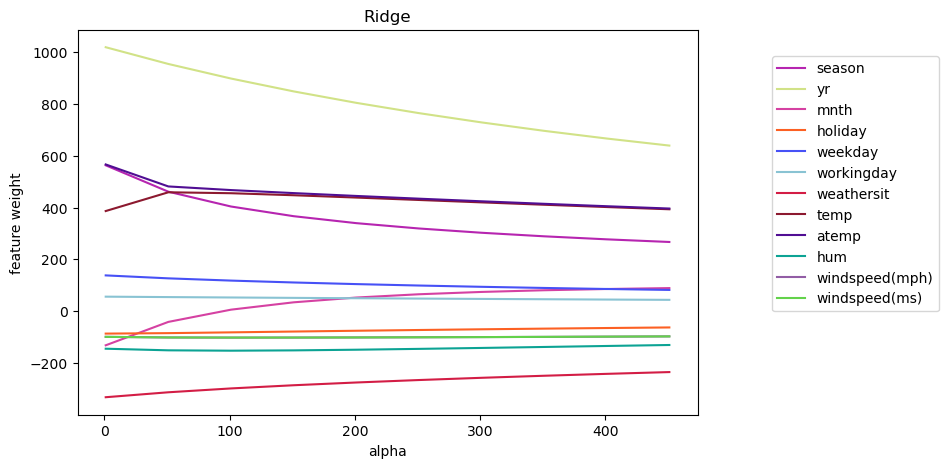

In [14]:
plt.figure(figsize=(8, 5))

for coef, feature in zip(coefs_lasso.T, df.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))

plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Lasso")

plt.figure(figsize=(8, 5))
for coef, feature in zip(coefs_ridge.T, df.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))

plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Ridge")

plt.show()

Проаналізуйте графіки та дайте відповіді на такі запитання.

1. Який регуляризатор (Ridge або Lasso) агресивніше зменшує ваги при одному й тому самому alpha?
1. Що станеться з вагами Lasso, якщо alpha зробити дуже великим? Поясніть, чому так відбувається.
1. Чи можна стверджувати, що `Lasso` виключає одну з ознак `windspeed` при будь-якому значенні `alpha > 0`? А Ridge? Вважається, що регуляризатор виключає ознаку, якщо коефіцієнт при ньому менший $10^{-3}$.
1. Який із регуляризаторів підійде для відбору неінформативних ознак?

Відповіді:
1. Lasso агресивніше зменшує ваги при одному й тому самому alpha.
2. Ваги Lasso прагнуть до нуля. Чим вищий коефіцієнт alpha тим менш складна модель. В крайньому випадку збільшення alpha зануляє всі ваги.
3. Так, Lasso виключає одну з ознак windspeed при будь-якому значенні alpha > 0. Ridge не виключає ознаки.
4. Lasso

### Завдання 8

Далі будемо працювати з `Lasso`.

Отже, ми бачимо, що при зміні alpha модель по-різному підбирає коефіцієнти ознак. Нам потрібно вибрати найкраще alpha.

Для цього, по-перше, нам потрібна метрика якості. Будемо використовувати як метрику сам оптимізований функціонал методу найменших квадратів, тобто `Mean Square Error`.

По-друге, потрібно зрозуміти, на яких даних цю метрику рахувати. Не можна вибирати `alpha` за значенням MSE на навчальній вибірці, тому що тоді ми не зможемо оцінити, як модель буде робити передбачення на нових для неї даних. Якщо ми виберемо одне розбиття вибірки на навчальну та тестову (це називається holdout), то налаштуємося на конкретні "нові" дані, і знову можемо перенавчитися. Тому будемо робити декілька розбиттів вибірки, на кожному пробувати різні значення alpha, а потім усереднювати MSE. Найзручніше робити такі розбиття крос-валідацією, тобто розділити вибірку на $K$ частин, і кожного разу брати одну з них як тестову, а з блоків, що залишилися, складати навчальну вибірку.

Робити крос-валідацію для регресії в sklearn зовсім просто: для цього є спеціальний регресор, __LassoCV__, який бере на вхід список із alpha і для кожного з них обчислює MSE на крос-валідації. Після навчання (якщо залишити параметр cv=3 за замовчуванням) регресор буде містити змінну __mse\_path\___, матрицю розміру len(alpha) x k, k = 3 (число блоків у крос-валідації), що містить значення MSE на тесті для відповідних запусків. Крім того, у змінній alpha\_ буде зберігатися вибране значення параметра регуляризації, а в coef\_, традиційно, навчені ваги, що відповідають цьому alpha_.

Зверніть увагу, що регресор може змінювати порядок, у якому він проходить по alphas; для зіставлення з матрицею MSE краще використовувати змінну регресора alphas_.

Навчіть регресор `LassoCV` на всіх параметрах регуляризації з alpha. Побудуйте графік _усередненого_ за рядками `MSE` в залежності від `alpha` (використовуйте для цього функцію `create_plot`).

Виведіть вибране `alpha`, а також пари "ознака-коефіцієнт" для навченого вектора коефіцієнтів.

In [15]:
def create_plot(data, title, xlabel, ylabel, figsize=None):
    size = figsize or (15, 5)
    plt.figure(figsize=size)

    x = map(lambda e: e[0], data)
    y = map(lambda e: e[1], data)
    plt.plot(list(x), list(y))

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.grid()
    plt.show()

Alpha = 6
season: 532.0189828413536
yr: 1015.0602226430597
mnth: -100.03952614356652
holiday: -83.2939598752991
weekday: 132.50446549095793
workingday: 51.557085614074055
weathersit: -330.5598567399815
temp: 370.67985503003166
atemp: 581.3969310655002
hum: -140.00740550068855
windspeed(mph): -191.7714084713498
windspeed(ms): -2.6855326892515688e-08


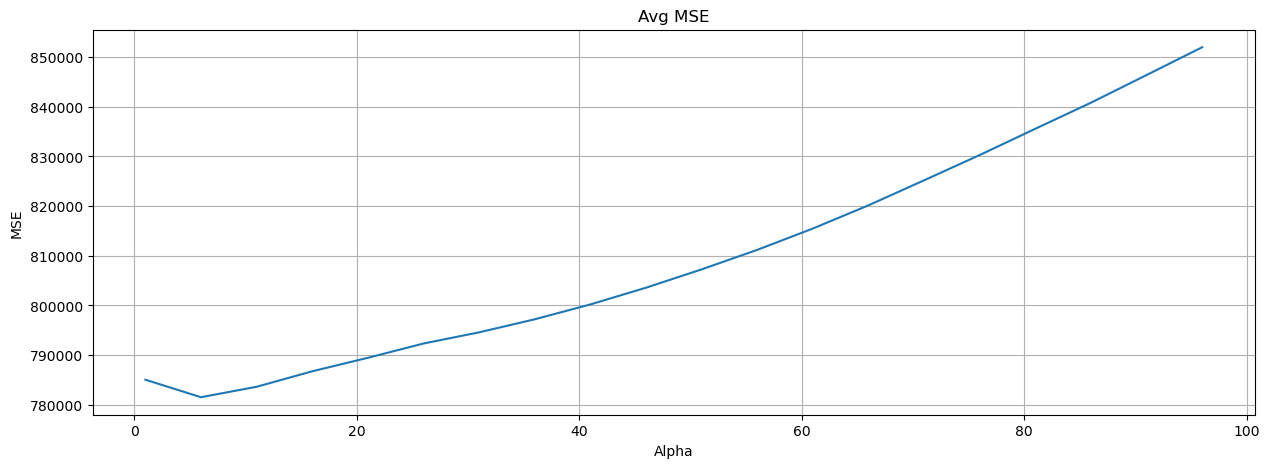

In [16]:
from sklearn.linear_model import LassoCV

alphas = np.arange(1, 100, 5)

regressor = LassoCV(alphas=alphas, cv=3) # Put your code here
regressor.fit(X, y)

print(f"Alpha = {regressor.alpha_}")
for column, coef in zip(df.columns[:-1], regressor.coef_):
    print(f"{column}: {coef}")

create_plot(
    data=list(zip(regressor.alphas_, regressor.mse_path_.mean(axis=1))),
    title="Avg MSE",
    xlabel="Alpha",
    ylabel="MSE"
)


Отже, ми вибрали певний параметр регуляризації. Давайте подивимося, які б ми вибирали alpha, якби ділили вибірку лише один раз на навчальну та тестову, тобто розглянемо траєкторії MSE, що відповідають окремим блокам вибірки.

### Завдання 9

Виведіть значення `alpha`, що відповідають мінімумам `MSE` на кожному розбитті (тобто за стовпцями).
На трьох окремих графіках візуалізуйте стовпці `mse_path_`.


Alphas with minimum MSE:
Alpha = 6, MSE = 733725.760405224
Alpha = 1, MSE = 799433.1673691698
Alpha = 51, MSE = 796979.8955193625


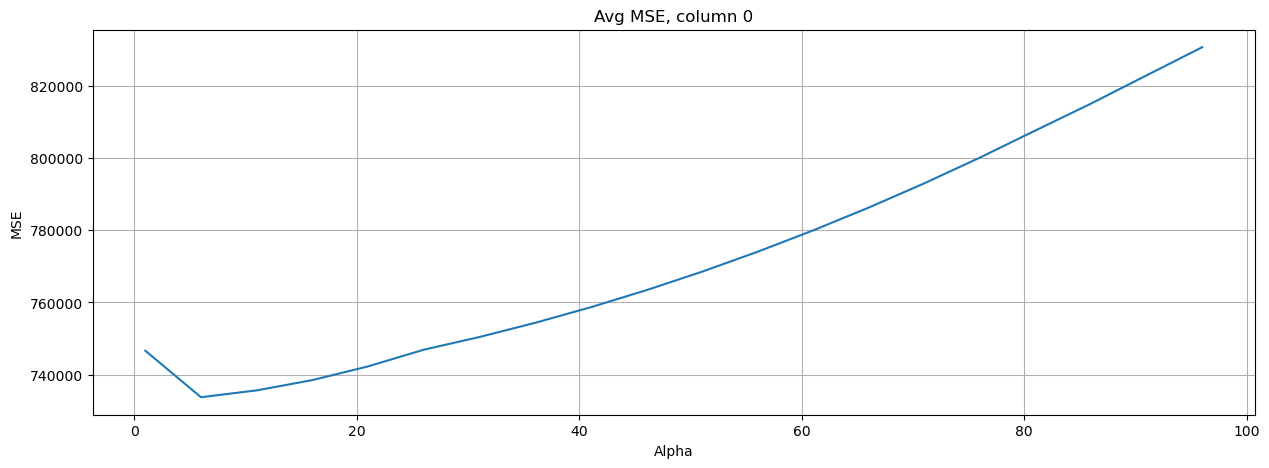

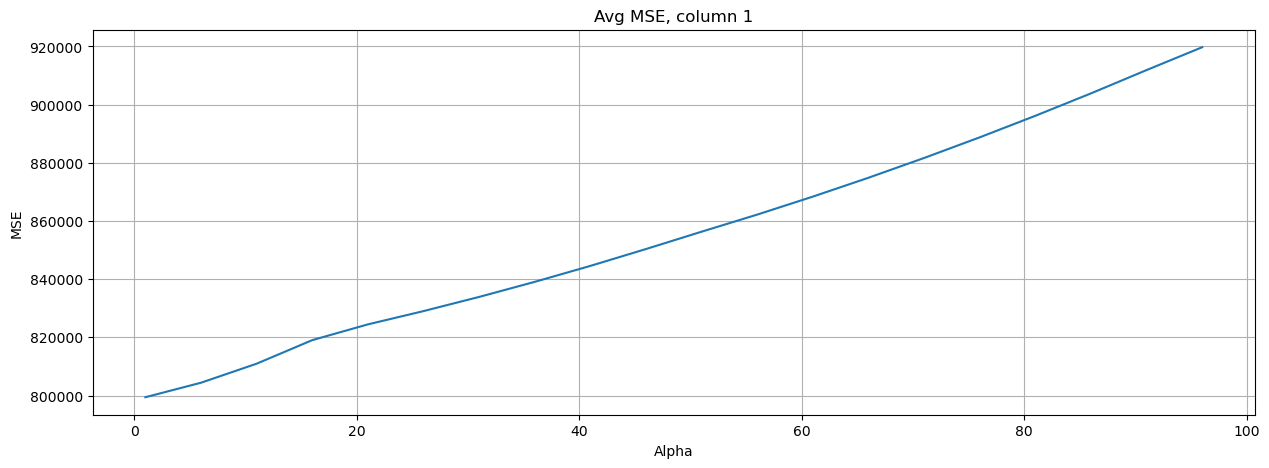

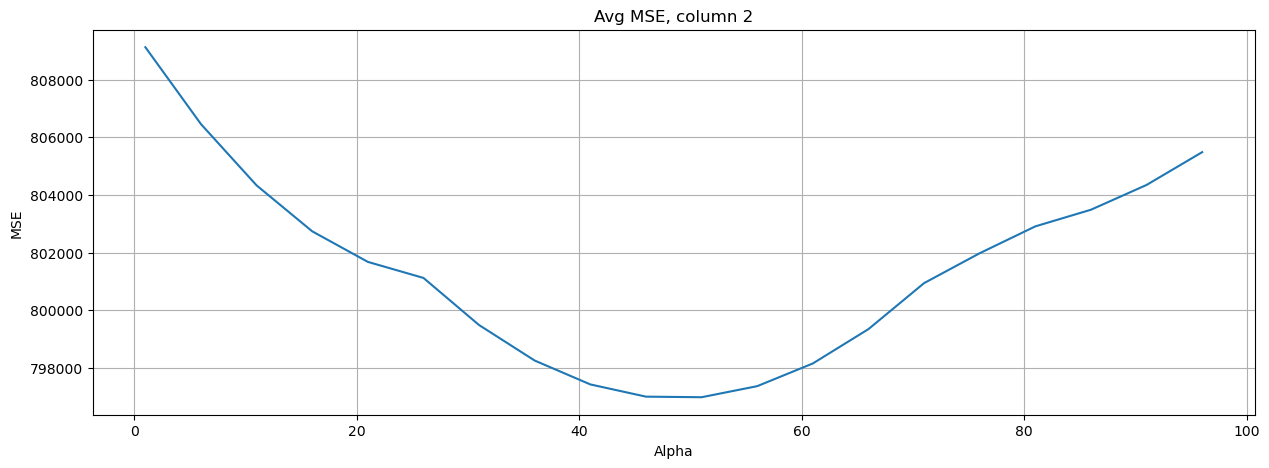

In [17]:
# Put your code here

print("Alphas with minimum MSE:")
for index, val in zip(regressor.mse_path_.argmin(axis=0), regressor.mse_path_.min(axis=0)):
    print(f"Alpha = {regressor.alphas_[index]}, MSE = {val}")

for i in range(3):
    create_plot(
        data=list(zip(regressor.alphas_, regressor.mse_path_[:,i])),
        title=f"Avg MSE, column {i}",
        xlabel="Alpha",
        ylabel="MSE"
    )


На кожному розбитті оптимальне значення `alpha` своє, і йому відповідає велике MSE на інших розбиттях. Виходить, що ми налаштовуємося на конкретні навчальні та контрольні вибірки. При виборі `alpha` на крос-валідації ми вибираємо дещо "середнє", що даватиме прийнятне значення метрики на різних розбиттях вибірки.

### Завдання 10

Нарешті, як прийнято в аналізі даних, давайте проінтерпретуємо результат. Дайте відповіді на наступні запитання.

#### Запитання 1

В останній навченій моделі виберіть 4 ознаки з найбільшими (позитивними) коефіцієнтами (і випишіть їх), подивіться на візуалізації залежностей `cnt` від цих ознак, які ми зображали у блоці "Ознайомлення з даними". Чи видно зростаючу лінійну залежність `cnt` від цих ознак за графіками? Чи логічно стверджувати (виходячи зі здорового глузду), що чим більше значення цих ознак, тим більше людей захочуть взяти велосипеди?

__Відповідь:__

In [18]:
# ???
df = pd.DataFrame(regressor.coef_, index=df.columns[:-1], columns=["coef"])
df.sort_values(by="coef", ascending=False)[:4]

# видно зростаючу лінійну залежність `cnt` від ознак за графіками: atemp, temp
#
# Чи логічно стверджувати (виходячи зі здорового глузду), що чим більше значення цих ознак, тим більше людей захочуть взяти велосипеди?
# для atemp і temp - так, для yr і season - ні



,coef
yr,1015.060223
atemp,581.396931
season,532.018983
temp,370.679855


#### Запитання 2

Виберіть 3 ознаки з найбільшими за модулем негативними коефіцієнтами (і випишіть їх), подивіться на відповідні візуалізації. Чи видно лінійну залежність, що зменшується? Чи логічно стверджувати, що чим більша величина цих ознак, тим менше людей захочуть взяти велосипеди?

__Відповідь:__

In [19]:
# ???
df.sort_values(by="coef", ascending=True)[:3]

# Чи видно лінійну залежність, що зменшується?
# weathersit - так, windspeed(mph), hum - ні

# Чи логічно стверджувати, що чим більша величина цих ознак, тим менше людей захочуть взяти велосипеди?
# weathersit, windspeed(mph) - так, hum - ні


,coef
weathersit,-330.559857
windspeed(mph),-191.771408
hum,-140.007406


#### Запитання 3

Випишіть ознаки з коефіцієнтами, близькими до нуля (< 1e-3). Як ви думаєте, чому модель виключила їх із моделі (знову подивіться на графіки)? Чи правда, що вони ніяк не впливають на попит на велосипеди?

__Відповідь:__

In [20]:
# ???
df[df.coef.abs()<1e-3]

# чому модель виключила їх із моделі?
# windspeed(ms) і windspeed(mph) - це одна і та ж величина виражена в різних одиницях - дублюючий параметр був виключений

# Чи правда, що вони ніяк не впливають на попит на велосипеди?
# вплив є, але він врахований в параметрі windspeed(mph). windspeed(ms) - не потрібен


,coef
windspeed(ms),-2.685533e-08


### Висновок
Отже, ми подивилися, як можна стежити за адекватністю лінійної моделі, як відбирати ознаки і як грамотно, за можливості не налаштовуючись на якусь конкретну порцію даних, підбирати коефіцієнт регуляризації.

Варто зазначити, що за допомогою крос-валідації зручно підбирати лише невелику кількість параметрів. (1, 2, максимум 3), тому що для кожної допустимої їх комбінації нам доводиться декілька разів навчати модель. Такий процес займає багато часу, особливо якщо треба навчатися на великих обсягах даних.